In [1]:
import os
import pandas as pd
import warnings
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns

from tqdm import tqdm
from random import randint
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import itertools
import sys
import sklearn.preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import time


sys.path.append("../1_Format_donnees/")
sys.path.append("../")
from aggregation import load_and_preprocess_agg_window, Scaler_Metrics
from evaluate import plot_confusion_matrix, get_scores

In [2]:
DEFAULT_LENGTH_Value = 60
STEP = 5

In [3]:
df_train = load_and_preprocess_agg_window("../Mesures/train", length_value = DEFAULT_LENGTH_Value, step = STEP)

df_test = load_and_preprocess_agg_window("../Mesures/test", length_value = DEFAULT_LENGTH_Value, step = STEP)
df_test


Load datasets...
Extracting ../Mesures/train\messenger20221117_125310.csv.... 1/39


100%|█████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 106.67it/s]


Extracting ../Mesures/train\messenger20221124_143112.csv.... 2/39


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 33.73it/s]


Extracting ../Mesures/train\messenger20221125_130559.csv.... 3/39


100%|██████████████████████████████████████████████████████████████████████████████████| 38/38 [00:00<00:00, 96.44it/s]


Extracting ../Mesures/train\messenger20221129_131204.csv.... 4/39


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:01<00:00, 11.50it/s]


Extracting ../Mesures/train\messenger20221129_151124.csv.... 5/39


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  6.34it/s]


Extracting ../Mesures/train\messenger20230207_133921.csv.... 6/39


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.36it/s]


Extracting ../Mesures/train\messenger20230209_083453.csv.... 7/39


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  4.34it/s]


Extracting ../Mesures/train\pure_noise20230106_132210.csv.... 8/39


100%|███████████████████████████████████████████████████████████████████████████████| 805/805 [00:00<00:00, 991.59it/s]


Extracting ../Mesures/train\skype20221129_164105.csv.... 9/39


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 12.38it/s]


Extracting ../Mesures/train\skype20221206_125510.csv.... 10/39


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 34.23it/s]


Extracting ../Mesures/train\skype20221208_104403.csv.... 11/39


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.74it/s]


Extracting ../Mesures/train\skype20221208_124925.csv.... 12/39


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.46it/s]


Extracting ../Mesures/train\skype20221215_151512.csv.... 13/39


100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 43.22it/s]


Extracting ../Mesures/train\skype20221215_155618.csv.... 14/39


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 27.22it/s]


Extracting ../Mesures/train\skype20221215_164208.csv.... 15/39


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  5.98it/s]


Extracting ../Mesures/train\skype20221215_174819.csv.... 16/39


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00,  8.85it/s]


Extracting ../Mesures/train\spotify20230201_092702.csv.... 17/39


100%|█████████████████████████████████████████████████████████████████████████████| 1750/1750 [00:01<00:00, 876.17it/s]


Extracting ../Mesures/train\spotify20230203_165507.csv.... 18/39


100%|██████████████████████████████████████████████████████████████████████████████| 522/522 [00:00<00:00, 1006.10it/s]


Extracting ../Mesures/train\spotify20230216_141318.csv.... 19/39


100%|██████████████████████████████████████████████████████████████████████████████| 364/364 [00:00<00:00, 1008.21it/s]


Extracting ../Mesures/train\twitch20221117_113554.csv.... 20/39


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 89.45it/s]


Extracting ../Mesures/train\twitch20221118_075454.csv.... 21/39


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 51.43it/s]


Extracting ../Mesures/train\twitch20221125_133859.csv.... 22/39


100%|████████████████████████████████████████████████████████████████████████████████| 108/108 [00:01<00:00, 78.65it/s]


Extracting ../Mesures/train\twitch20230110_110215.csv.... 23/39


100%|█████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 101.87it/s]


Extracting ../Mesures/train\twitch20230110_120513.csv.... 24/39


100%|█████████████████████████████████████████████████████████████████████████████████| 59/59 [00:00<00:00, 304.88it/s]


Extracting ../Mesures/train\twitch20230110_130648.csv.... 25/39


100%|███████████████████████████████████████████████████████████████████████████████| 426/426 [00:00<00:00, 698.92it/s]


Extracting ../Mesures/train\youtube20221108_165214.csv.... 26/39


100%|█████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 550.51it/s]


Extracting ../Mesures/train\youtube20221108_182416.csv.... 27/39


100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 286.46it/s]


Extracting ../Mesures/train\youtube20221124_125524.csv.... 28/39


100%|███████████████████████████████████████████████████████████████████████████████| 186/186 [00:00<00:00, 937.00it/s]


Extracting ../Mesures/train\youtube20221124_154037.csv.... 29/39


100%|█████████████████████████████████████████████████████████████████████████████████| 92/92 [00:00<00:00, 864.36it/s]


Extracting ../Mesures/train\youtube20221130_103723.csv.... 30/39


100%|█████████████████████████████████████████████████████████████████████████████████| 91/91 [00:00<00:00, 837.07it/s]


Extracting ../Mesures/train\youtube20230110_145404.csv.... 31/39


100%|████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 1013.10it/s]


Extracting ../Mesures/train\youtube20230110_161955.csv.... 32/39


100%|█████████████████████████████████████████████████████████████████████████████████| 90/90 [00:00<00:00, 851.32it/s]


Extracting ../Mesures/train\youtube20230112_125508.csv.... 33/39


100%|███████████████████████████████████████████████████████████████████████████████| 108/108 [00:00<00:00, 533.45it/s]


Extracting ../Mesures/train\youtube20230112_151029.csv.... 34/39


100%|█████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 646.18it/s]


Extracting ../Mesures/train\youtube20230112_154749.csv.... 35/39


100%|█████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 552.88it/s]


Extracting ../Mesures/train\youtube20230112_163634.csv.... 36/39


100%|█████████████████████████████████████████████████████████████████████████████████| 65/65 [00:00<00:00, 700.53it/s]


Extracting ../Mesures/train\youtube20230117_095221.csv.... 37/39


100%|███████████████████████████████████████████████████████████████████████████████| 140/140 [00:00<00:00, 322.88it/s]


Extracting ../Mesures/train\youtube20230118_134041.csv.... 38/39


100%|███████████████████████████████████████████████████████████████████████████████| 212/212 [00:00<00:00, 259.53it/s]


Extracting ../Mesures/train\youtube20230124_124323.csv.... 39/39


100%|███████████████████████████████████████████████████████████████████████████████| 163/163 [00:00<00:00, 232.32it/s]


Reformat...


100%|█████████████████████████████████████████████████████████████████████████████| 5593/5593 [00:12<00:00, 459.78it/s]


Load datasets...
Extracting ../Mesures/test\messenger20221124_151137.csv.... 1/7


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 16.60it/s]


Extracting ../Mesures/test\messenger20230208_132747.csv.... 2/7


100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:04<00:00,  6.54it/s]


Extracting ../Mesures/test\skype20221206_150902.csv.... 3/7


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.92it/s]


Extracting ../Mesures/test\spotify20230127_134348.csv.... 4/7


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 856.38it/s]


Extracting ../Mesures/test\twitch20221124_163054.csv.... 5/7


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 20.53it/s]


Extracting ../Mesures/test\youtube20221118_104205.csv.... 6/7


100%|███████████████████████████████████████████████████████████████████████████████| 218/218 [00:00<00:00, 867.28it/s]


Extracting ../Mesures/test\youtube20230117_121925.csv.... 7/7


100%|███████████████████████████████████████████████████████████████████████████████| 260/260 [00:00<00:00, 560.63it/s]


Reformat...


100%|███████████████████████████████████████████████████████████████████████████████| 765/765 [00:05<00:00, 141.01it/s]


,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,label
20221124_151137_4_0,4400,0,33008,62944,111664,9960,31672,26296,7896,18736,...,0,0,0,28456,41504,9904,16880,1120,1608,messenger
20221124_151137_4_5,9960,31672,26296,7896,18736,24376,11032,0,0,0,...,9904,16880,1120,1608,5040,67376,38608,71560,145080,messenger
20221124_151137_4_10,24376,11032,0,0,0,0,41304,4240,0,8576,...,67376,38608,71560,145080,137560,145440,155472,120328,150624,messenger
20221124_151137_4_15,0,41304,4240,0,8576,4048,4216,26016,48224,4384,...,145440,155472,120328,150624,194512,196488,168464,113928,144616,messenger
20221124_151137_4_20,4048,4216,26016,48224,4384,25096,48136,24840,0,0,...,196488,168464,113928,144616,158248,125112,136360,146976,133488,messenger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230117_121925_263_25,0,0,0,0,0,28184,0,15480,0,0,...,0,0,0,0,2336,96600,560,1304,0,youtube
20230117_121925_263_30,28184,0,15480,0,0,0,0,0,0,0,...,96600,560,1304,0,0,0,0,467640,0,youtube
20230117_121925_263_35,0,0,0,0,0,0,14000,592,0,0,...,0,0,467640,0,0,0,296240,110272,0,youtube
20230117_121925_263_40,0,14000,592,0,0,0,0,0,0,0,...,0,296240,110272,0,0,0,0,0,0,youtube


# Noise

In [4]:
df_train

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,label
20221117_125310_4_0,2592,0,52176,40096,80224,80112,328,0,0,0,...,0,0,0,0,0,0,0,0,0,messenger
20221117_125310_4_5,80112,328,0,0,0,0,0,0,0,21864,...,0,0,0,0,448,0,0,2688,672,messenger
20221117_125310_4_10,0,0,0,0,21864,0,0,0,392,584,...,0,0,2688,672,4600,0,0,0,0,messenger
20221117_125310_4_15,0,0,0,392,584,5712,0,0,0,0,...,0,0,0,0,0,0,0,33688,0,messenger
20221117_125310_4_20,5712,0,0,0,0,0,0,0,0,31624,...,0,0,33688,0,5912,13168,5536,3440,2848,messenger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230124_124323_166_25,0,0,0,0,0,26952,58424,0,0,0,...,0,0,0,0,0,448,0,3696,2152,youtube
20230124_124323_166_30,26952,58424,0,0,0,0,8704,0,0,7744,...,448,0,3696,2152,896,200032,0,0,7440,youtube
20230124_124323_166_35,0,8704,0,0,7744,53000,22632,0,45472,0,...,200032,0,0,7440,26032,8304,896,13024,11232,youtube
20230124_124323_166_40,53000,22632,0,45472,0,0,0,0,0,27344,...,8304,896,13024,11232,62224,1914104,323552,2152,6872,youtube


In [5]:
df_train=df_train[df_train.label!="noise"]

In [6]:
df_test = df_test[df_test.label!="noise"]

# Scale

In [7]:
scaler = Scaler_Metrics()
training_data = scaler.fit_transform(df_train)
testing_data = scaler.transform(df_test)

In [8]:
training_data

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,label
id,,,,,,,,,,,,,,,,,,,,,
20221117_125310_4_0,-1.472712,-1.496992,-1.061100,-1.163197,-0.828538,-0.829004,-1.494305,-1.497269,-1.497762,-1.497853,...,-0.787843,-0.797746,-0.819360,-0.794999,-0.770268,-0.789489,-0.805208,-0.824764,-0.798502,messenger
20221117_125310_4_5,-0.828388,-1.494263,-1.495717,-1.496651,-1.496604,-1.494686,-1.497034,-1.497269,-1.497762,-1.315736,...,-0.787843,-0.797746,-0.819360,-0.794999,-0.768844,-0.789489,-0.805208,-0.815517,-0.796281,messenger
20221117_125310_4_10,-1.494256,-1.496992,-1.495717,-1.496651,-1.314532,-1.494686,-1.497034,-1.497269,-1.494502,-1.492989,...,-0.787843,-0.797746,-0.810215,-0.792797,-0.755641,-0.789489,-0.805208,-0.824764,-0.798502,messenger
20221117_125310_4_15,-1.494256,-1.496992,-1.495717,-1.493391,-1.491741,-1.447223,-1.497034,-1.497269,-1.497762,-1.497853,...,-0.787843,-0.797746,-0.819360,-0.794999,-0.770268,-0.789489,-0.805208,-0.708883,-0.798502,messenger
20221117_125310_4_20,-1.446779,-1.496992,-1.495717,-1.496651,-1.496604,-1.494686,-1.497034,-1.497269,-1.497762,-1.234439,...,-0.787843,-0.797746,-0.704741,-0.794999,-0.751469,-0.746889,-0.786800,-0.812931,-0.789090,messenger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230124_124323_166_25,-1.494256,-1.496992,-1.495717,-1.496651,-1.496604,-1.270731,-1.010989,-1.497269,-1.497762,-1.497853,...,-0.787843,-0.797746,-0.819360,-0.794999,-0.770268,-0.788040,-0.805208,-0.812050,-0.791390,youtube
20230124_124323_166_30,-1.270238,-1.010789,-1.495717,-1.496651,-1.496604,-1.494686,-1.424623,-1.497269,-1.497762,-1.433349,...,-0.786403,-0.797746,-0.806785,-0.787946,-0.767419,-0.142361,-0.805208,-0.824764,-0.773914,youtube
20230124_124323_166_35,-1.494256,-1.424558,-1.495717,-1.496651,-1.432116,-1.054288,-1.308752,-1.497269,-1.119551,-1.497853,...,-0.144942,-0.797746,-0.819360,-0.770614,-0.687489,-0.762625,-0.802228,-0.779963,-0.761382,youtube


In [9]:
data_col = training_data.columns[:-1]
X_train, X_test = training_data[data_col].values, testing_data[data_col].values
#X_train, X_test = X_train.reshape((-1,DEFAULT_LENGTH_Value,2), order='F'), X_test.reshape((-1,DEFAULT_LENGTH_Value,2), order='F')
y_train, y_test = training_data.label, testing_data.label
#X_train[0,:5]

# Binarize

In [10]:


label_binarizer = sklearn.preprocessing.LabelBinarizer()
y_train_encoded = label_binarizer.fit_transform(y_train)
y_test_encoded = label_binarizer.transform(y_test)

y_test_encoded

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]])

In [11]:
uniq_label = training_data.label.unique()
correspondance = dict(zip(uniq_label,label_binarizer.transform(uniq_label)))
correspondance


{'messenger': array([1, 0, 0, 0, 0]),
 'skype': array([0, 1, 0, 0, 0]),
 'spotify': array([0, 0, 1, 0, 0]),
 'twitch': array([0, 0, 0, 1, 0]),
 'youtube': array([0, 0, 0, 0, 1])}

# Class_weight

In [12]:


class_weights = dict(zip(np.unique(y_train), compute_class_weight(class_weight ='balanced',
                                                  classes =np.unique(y_train),
                                                               y =y_train)))
class_weights

{'messenger': 0.672936881544817,
 'skype': 0.4938207197997814,
 'spotify': 3.1495503597122303,
 'twitch': 1.5738905740927986,
 'youtube': 1.8654061251664447}

# Train

In [13]:
vb = True

## KNN

In [14]:
time_counter = time.time_ns()

model = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
#model = GridSearchCV(model, param_grid, cv=None, scoring='accuracy', return_train_score=False, verbose = vb)
model.fit(X_train, y_train)
accuracy = model.score(X_train,y_train)
print(f"accuracy on train : {accuracy}")
accuracy = model.score(X_test,y_test)
print(f"accuracy on test : {accuracy}")

training_duration = (time.time_ns() - time_counter)/(10**9)
print(f"Training Duration : {training_duration} s for a dataset length of {len(y_train)}")

accuracy on train : 0.8721411643776946
accuracy on test : 0.5182788525683789
Training Duration : 27.1969838 s for a dataset length of 70046


normalized confusion matrix


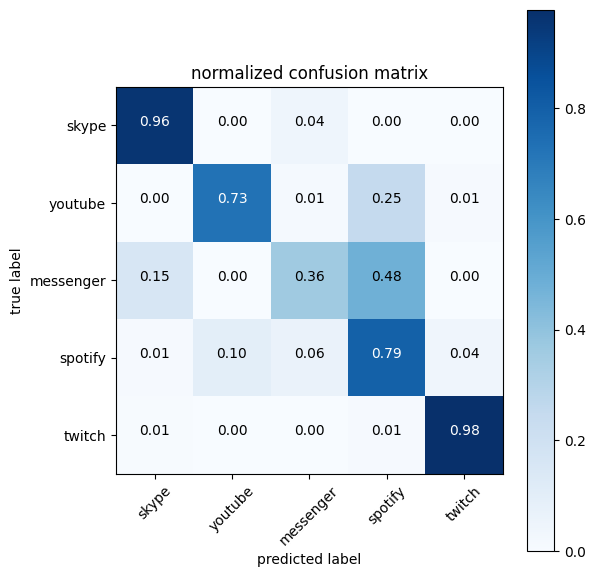

Testing Duration : 7.749865 s for a dataset length of 29980
Testing Duration per data : 0.2585011674449633 ms


In [15]:
time_counter = time.time_ns()

# mesure efficiency
preds_labels =  model.predict(testing_data[testing_data.columns[:-1]])
true_labels = testing_data.label
plot_confusion_matrix(true_labels,preds_labels)

testing_duration = (time.time_ns() - time_counter)/(10**9)
print(f"Testing Duration : {testing_duration} s for a dataset length of {len(y_test)}")
testing_duration_per_item = testing_duration*(10**3)/len(y_test)
print(f"Testing Duration per data : {testing_duration_per_item} ms")

In [16]:
get_scores(true_labels,preds_labels)

{'Accuracy': 0.7635801884163312,
 'Precision': 0.8803337765149775,
 'Recall': 0.5182788525683789,
 'F1_Score': 0.5845641105034338,
 'support': None}

## RF

In [17]:
time_counter = time.time_ns()

model = RandomForestClassifier(class_weight =class_weights )
param_grid = {'n_estimators': [15, 50, 100],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'criterion' :['gini', 'entropy']
                         }
param_grid = dict(n_neighbors=k_range)
#model = GridSearchCV(estimator=model, param_grid=param_grid, cv=None,scoring ='accuracy', return_train_score=False, verbose = vb)
model.fit(X_train, y_train)
accuracy = model.score(X_train,y_train)
print(f"accuracy on train : {accuracy}")
accuracy = model.score(X_test,y_test)
print(f"accuracy on test : {accuracy}")

training_duration = (time.time_ns() - time_counter)/(10**9)
print(f"Training Duration : {training_duration} s for a dataset length of {len(y_train)}")

accuracy on train : 1.0
accuracy on test : 0.8704803202134757
Training Duration : 118.3693363 s for a dataset length of 70046


normalized confusion matrix


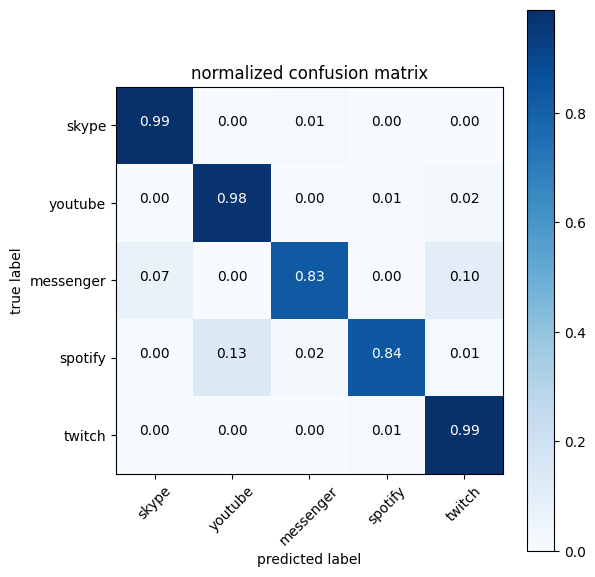

Testing Duration : 0.7974688 s for a dataset length of 29980
Testing Duration per data : 0.026600026684456303 ms


In [18]:
time_counter = time.time_ns()

# mesure efficiency
preds_labels =  model.predict(testing_data[testing_data.columns[:-1]])
true_labels = testing_data.label
plot_confusion_matrix(true_labels,preds_labels)
            

testing_duration = (time.time_ns() - time_counter)/(10**9)
print(f"Testing Duration : {testing_duration} s for a dataset length of {len(y_test)}")
testing_duration_per_item = testing_duration*(10**3)/len(y_test)
print(f"Testing Duration per data : {testing_duration_per_item} ms")            

In [19]:
get_scores(true_labels,preds_labels)

{'Accuracy': 0.9228729941420628,
 'Precision': 0.9222931029376668,
 'Recall': 0.8704803202134757,
 'F1_Score': 0.8822472986846381,
 'support': None}

## SVM

In [20]:
time_counter = time.time_ns()

model = SVC(class_weight =class_weights )
param_grid = {'degree': list(range(1,5)),
              #'kernel': ["linear", "poly", "rbf", "sigmoid", "precomputed"],
              "gamma" : ["scale", "auto"]
                         }
param_grid = dict(n_neighbors=k_range)
#model = GridSearchCV(estimator=model, param_grid=param_grid, cv=None,scoring ='accuracy', return_train_score=False, verbose = vb)
model.fit(X_train, y_train)
accuracy = model.score(X_train,y_train)
print(f"accuracy on train : {accuracy}")
accuracy = model.score(X_test,y_test)
print(f"accuracy on test : {accuracy}")

training_duration = (time.time_ns() - time_counter)/(10**9)
print(f"Training Duration : {training_duration} s for a dataset length of {len(y_train)}")

accuracy on train : 0.8240870285241128
accuracy on test : 0.583422281521014
Training Duration : 661.1417894 s for a dataset length of 70046


normalized confusion matrix


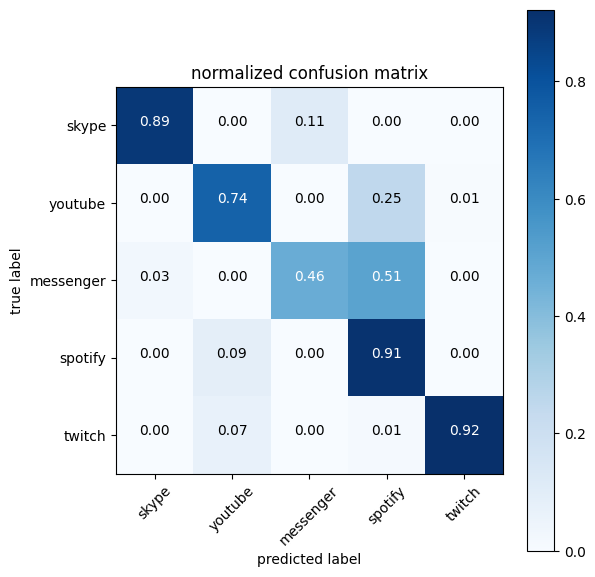

Testing Duration : 146.8771253 s for a dataset length of 29980
Testing Duration per data : 4.899170290193462 ms


In [21]:
time_counter = time.time_ns()

# mesure efficiency
preds_labels =  model.predict(testing_data[testing_data.columns[:-1]])
true_labels = testing_data.label
plot_confusion_matrix(true_labels,preds_labels)

testing_duration = (time.time_ns() - time_counter)/(10**9)
print(f"Testing Duration : {testing_duration} s for a dataset length of {len(y_test)}")
testing_duration_per_item = testing_duration*(10**3)/len(y_test)
print(f"Testing Duration per data : {testing_duration_per_item} ms")

In [22]:
get_scores(true_labels,preds_labels)

{'Accuracy': 0.7864126829783902,
 'Precision': 0.916030168100027,
 'Recall': 0.583422281521014,
 'F1_Score': 0.6787174052388639,
 'support': None}